In [1]:
#Import the data using pandas
import pandas as pd
data = pd.read_csv("Cancer_model_cdata.csv")

In [2]:
data.head()

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG.DT,...,MELANOMA_DT,multiple_cancer,cancer_type,Category_Race,Age,ageCat,Diag_date,Death,Target,Survival_Days
0,02/12/59,NaN,Male,Black/African-American,1,0,0,0,0,01/09/13,...,NaN,1,Lung Cancer,African-American,57,"(50,60]",01/09/13,0,25/08/16,1089
1,18/11/55,20/04/16,Male,Black/African-American,1,0,0,0,0,02/04/16,...,NaN,1,Lung Cancer,African-American,61,"(60,70]",02/04/16,1,25/08/16,18
2,14/01/46,25/05/15,Female,Black/African-American,1,0,0,0,0,11/04/15,...,NaN,1,Lung Cancer,African-American,71,"(70,80]",11/04/15,1,25/08/16,44
3,03/11/46,NaN,Female,Black/African-American,0,0,1,0,0,NaN,...,NaN,1,Thyroid Cancer,African-American,70,"(60,70]",29/11/12,0,25/08/16,1365
4,10/06/38,NaN,Female,Black/African-American,0,0,1,0,0,NaN,...,NaN,1,Thyroid Cancer,African-American,78,"(70,80]",24/06/12,0,25/08/16,1523


In [3]:
# Importting the Libraries 
import numpy as np
import matplotlib.pyplot as plt
import lifelines 
from lifelines import KaplanMeierFitter

In [4]:
#List out the columns
data.columns

Index(['BIRTH_DATE_off', 'DEATH_DATE_off', 'sex', 'race', 'LUNG', 'PANCREAS',
       'THYROID', 'COLORECTAL', 'MELANOMA', 'LUNG.DT', 'PANCREAS_DT',
       'THYROID_DT', 'COLORECTAL_DT', 'MELANOMA_DT', 'multiple_cancer',
       'cancer_type', 'Category_Race', 'Age', 'ageCat', 'Diag_date', 'Death',
       'Target', 'Survival_Days'],
      dtype='object')

In [5]:
#List out the count and type of every columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   BIRTH_DATE_off   4128 non-null   object
 1   DEATH_DATE_off   322 non-null    object
 2   sex              4128 non-null   object
 3   race             4126 non-null   object
 4   LUNG             4128 non-null   int64 
 5   PANCREAS         4128 non-null   int64 
 6   THYROID          4128 non-null   int64 
 7   COLORECTAL       4128 non-null   int64 
 8   MELANOMA         4128 non-null   int64 
 9   LUNG.DT          1462 non-null   object
 10  PANCREAS_DT      651 non-null    object
 11  THYROID_DT       739 non-null    object
 12  COLORECTAL_DT    931 non-null    object
 13  MELANOMA_DT      341 non-null    object
 14  multiple_cancer  4128 non-null   int64 
 15  cancer_type      4128 non-null   object
 16  Category_Race    4128 non-null   object
 17  Age              4128 non-null   

In [6]:
#Calling the Kaplan Meier Fitter
km = KaplanMeierFitter()

In [7]:
#Fitting the Kaplan Meier Fitter 
km.fit(durations = data["Survival_Days"], event_observed = data["Death"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 4128 total observations, 3806 right-censored observations>

In [8]:
# Table of events using the Kaplan Meier Fitter 
km.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,6,5,1,4128,4128
1,2,2,0,0,4122
2,1,1,0,0,4120
3,1,1,0,0,4119
4,4,4,0,0,4118
...,...,...,...,...,...
13732,1,0,1,0,8
14498,1,0,1,0,7
16853,1,0,1,0,6


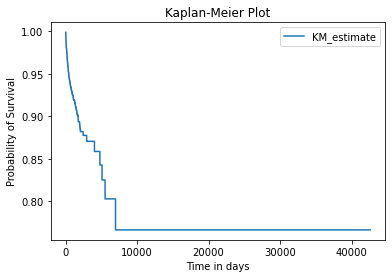

In [9]:
km.plot(ci_show=False)
plt.title("Kaplan-Meier Plot")
plt.ylabel("Probability of Survival")
plt.xlabel("Time in days")
plt.show()

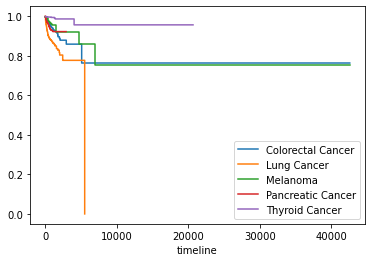

In [10]:
ax = plt.subplot(111)
km = KaplanMeierFitter()

for name, grouped_df in data.groupby('cancer_type'):
    km.fit(grouped_df["Survival_Days"], grouped_df["Death"], label=name)
    km.plot_survival_function(ax=ax,ci_show=False)


Which cancer has the highest survival for this cohort? Thyroid
Which cancer has the lowest survival for this cohort? Lung


How many patients had 2 cancer diagnosis? 29 (Obtained while doing data modelling using R - Refer R file)

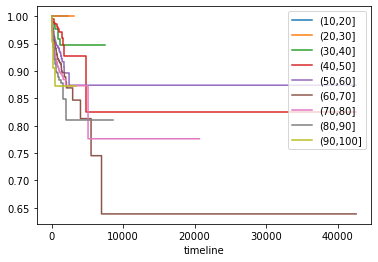

In [11]:
ax = plt.subplot(111)
km = KaplanMeierFitter()

for name, grouped_df in data.groupby('ageCat'):
    km.fit(grouped_df["Survival_Days"], grouped_df["Death"], label=name)
    km.plot_survival_function(ax=ax,ci_show=False)


Which age group has the lowest survival after 400 days since cancer diagnosis? Age group of 91 to 100 

In [12]:
Female_colorectal = data[(data.sex == "Female") & (data.cancer_type == "Colorectal Cancer")]

In [13]:
km.fit(durations = Female_colorectal["Survival_Days"], event_observed = Female_colorectal["Death"] )

<lifelines.KaplanMeierFitter:"(90,100]", fitted with 415 total observations, 386 right-censored observations>

In [14]:
km.predict(1000)

0.9414034663203517


what is the survival rate for females with colorectal cancer after 1000 days since diagnosis? 0.9414034663203517

In [15]:
Male_lung = data[(data.sex == "Male") & (data.cancer_type == "Lung Cancer")]

In [16]:
km.fit(durations = Male_lung["Survival_Days"], event_observed = Male_lung["Death"] )

<lifelines.KaplanMeierFitter:"(90,100]", fitted with 708 total observations, 613 right-censored observations>

In [17]:
km.predict(300)

0.9151063900478764


what is the survival rate for males with lung cancer after 300 days since diagnosis? 0.9151063900478764

In [18]:
Female_Melanoma = data[(data.sex == "Female") & (data.cancer_type == "Melanoma")]

In [19]:
km.fit(durations = Female_Melanoma["Survival_Days"], event_observed = Female_Melanoma["Death"] )

<lifelines.KaplanMeierFitter:"(90,100]", fitted with 161 total observations, 153 right-censored observations>

In [20]:
km.predict(1200)

0.9591273386775868


what is the survival rate for females with melanoma cancer after 1200 days since diagnosis? 0.9591273386775868

In [21]:
Male_thyroid = data[(data.sex == "Male") & (data.cancer_type == "Thyroid Cancer")]

In [22]:
km.fit(durations = Male_thyroid["Survival_Days"], event_observed = Male_thyroid["Death"] )

<lifelines.KaplanMeierFitter:"(90,100]", fitted with 203 total observations, 199 right-censored observations>

In [23]:
km.predict(1500)

0.9778981321453994


what is the survival rate for males with thyroid cancer after 1500 days since diagnosis? 0.9778981321453994

In [24]:
Male_pancreatic = data[(data.sex == "Male") & (data.cancer_type == "Pancreatic Cancer")]

In [25]:
km.fit(durations = Male_pancreatic["Survival_Days"], event_observed = Male_pancreatic["Death"] )

<lifelines.KaplanMeierFitter:"(90,100]", fitted with 335 total observations, 314 right-censored observations>

In [26]:
km.predict(2200)

0.9212332236957218


what is the survival rate for males with pancreatic cancer after 2200 days since diagnosis? 0.9212332236957218

In [5]:
AfAm_colorectal = data[(data.Category_Race == "African-American") & (data.cancer_type == "Colorectal Cancer")]

In [28]:
km.fit(durations = AfAm_colorectal["Survival_Days"], event_observed = AfAm_colorectal["Death"] )

<lifelines.KaplanMeierFitter:"(90,100]", fitted with 254 total observations, 221 right-censored observations>

In [6]:
AfAm_colorectal

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG.DT,...,MELANOMA_DT,multiple_cancer,cancer_type,Category_Race,Age,ageCat,Diag_date,Death,Target,Survival_Days
7,11/08/71,NaN,Female,Black/African-American,0,0,0,1,0,NaN,...,NaN,1,Colorectal Cancer,African-American,45,"(40,50]",01/01/14,0,25/08/16,967
8,22/03/48,07/01/16,Female,Black/African-American,0,0,0,1,0,NaN,...,NaN,1,Colorectal Cancer,African-American,68,"(60,70]",30/09/14,1,25/08/16,464
10,09/01/46,NaN,Female,Black/African-American,0,0,0,1,0,NaN,...,NaN,1,Colorectal Cancer,African-American,71,"(70,80]",14/09/13,0,25/08/16,1076
24,12/06/47,24/03/13,Male,Black/African-American,0,0,0,1,0,NaN,...,NaN,1,Colorectal Cancer,African-American,69,"(60,70]",30/07/09,1,25/08/16,1333
28,25/03/48,NaN,Female,Black/African-American,0,0,0,1,0,NaN,...,NaN,1,Colorectal Cancer,African-American,68,"(60,70]",07/10/15,0,25/08/16,323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009,05/09/52,NaN,Female,Black/African-American,0,0,0,1,0,NaN,...,NaN,1,Colorectal Cancer,African-American,64,"(60,70]",11/03/15,0,25/08/16,533
4033,20/08/59,NaN,Female,Black/African-American,0,0,0,1,0,NaN,...,NaN,1,Colorectal Cancer,African-American,57,"(50,60]",NaN,0,25/08/16,42607
4036,22/07/48,NaN,Male,Black/African-American,0,0,0,1,0,NaN,...,NaN,1,Colorectal Cancer,African-American,68,"(60,70]",23/05/16,0,25/08/16,94
4069,28/05/40,NaN,Female,Black/African-American,0,0,0,1,0,NaN,...,NaN,1,Colorectal Cancer,African-American,76,"(70,80]",27/08/15,0,25/08/16,364


In [29]:
km.predict(2000)

0.7437386681805599


what is the survival rate for African-Americans with colorectal cancer after 2000 days since diagnosis? 0.7437386681805599

In [30]:
White_lung = data[(data.Category_Race == "White") & (data.cancer_type == "Lung Cancer")]

In [31]:
km.fit(durations = White_lung["Survival_Days"], event_observed = White_lung["Death"] )

<lifelines.KaplanMeierFitter:"(90,100]", fitted with 900 total observations, 811 right-censored observations>

In [32]:
km.predict(1000)

0.901511062164881


what is the survival rate for White race with lung cancer after 1000 days since diagnosis? 0.901511062164881

In [33]:
AfAm_melanoma = data[(data.Category_Race == "African-American") & (data.cancer_type == "Melanoma")]

In [34]:
km.fit(durations = AfAm_melanoma["Survival_Days"], event_observed = AfAm_melanoma["Death"] )

<lifelines.KaplanMeierFitter:"(90,100]", fitted with 14 total observations, 12 right-censored observations>

In [35]:
km.predict(730)

0.8253968253968252


what is the survival rate for African-Americans with melanoma cancer after 2 years since diagnosis? 0.8253968253968252

In [36]:
White_pancreatic = data[(data.Category_Race == "White") & (data.cancer_type == "Pancreatic Cancer")]

In [37]:
km.fit(durations = White_pancreatic["Survival_Days"], event_observed = White_pancreatic["Death"] )

<lifelines.KaplanMeierFitter:"(90,100]", fitted with 440 total observations, 419 right-censored observations>

In [38]:
km.predict(1095)

0.9402213378776019


what is the survival rate for Whites with pancreatic cancer after 3 years since diagnosis? 0.9402213378776019

In [39]:
Asian_thyroid = data[(data.Category_Race == "Asian/Mideast-Indian") & (data.cancer_type == "Thyroid Cancer")]

In [40]:
km.fit(durations = Asian_thyroid["Survival_Days"], event_observed = Asian_thyroid["Death"] )

<lifelines.KaplanMeierFitter:"(90,100]", fitted with 37 total observations, 36 right-censored observations>

In [41]:
km.predict(1500)

0.9285714285714287


what is the survival rate for Asians with thyroid cancer after 1500 days since diagnosis? 0.9285714285714287

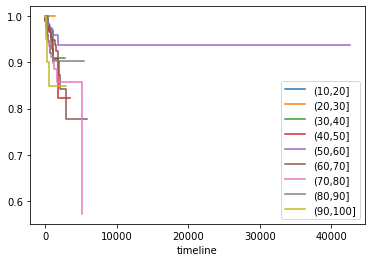

In [42]:
ax = plt.subplot(111)
km = KaplanMeierFitter()
Colorectal = data[(data.cancer_type  == "Colorectal Cancer")]

for name, grouped_df in Colorectal.groupby('ageCat'):
    km.fit(grouped_df["Survival_Days"], grouped_df["Death"], label=name)
    km.plot_survival_function(ax=ax,ci_show=False)



Which age group has the lowest survival for colorectal cancer at the end of the study? 71-80 #Check

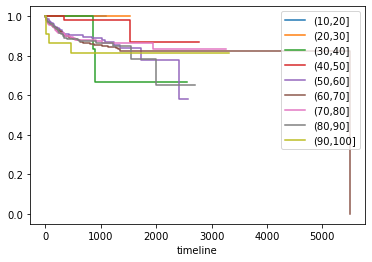

In [43]:
ax = plt.subplot(111)
km = KaplanMeierFitter()
Lung = data[(data.cancer_type  == "Lung Cancer")]

for name, grouped_df in Lung.groupby('ageCat'):
    km.fit(grouped_df["Survival_Days"], grouped_df["Death"], label=name)
    km.plot_survival_function(ax=ax,ci_show=False)


Which age group has the highest survival for lung cancer at the end of the study? 21-30 #Check

In [44]:
Age_Melanoma = data[(data.ageCat == "(60,70]") & (data.cancer_type == "Melanoma")]

In [45]:
km.fit(durations = Age_Melanoma["Survival_Days"], event_observed = Age_Melanoma["Death"] )

<lifelines.KaplanMeierFitter:"(90,100]", fitted with 92 total observations, 89 right-censored observations>

In [46]:
km.predict(1825)

0.977761119440279


what is the survival rate for 61-70 age group with melanoma cancer after 5 years since diagnosis? 0.81283422459893

In [47]:
Age_Pancreatic = data[(data.ageCat == "(20,30]") & (data.cancer_type == "Pancreatic Cancer")]

In [48]:
km.fit(durations = Age_Pancreatic["Survival_Days"], event_observed = Age_Pancreatic["Death"] )

<lifelines.KaplanMeierFitter:"(90,100]", fitted with 2 total observations, 2 right-censored observations>

In [49]:
km.predict(365)

1.0


what is the survival rate for 21 - 30 age group with pancreatic cancer after a year since diagnosis? 1.0

In [50]:
Age_thyroid = data[(data.ageCat == "(51,60]") & (data.cancer_type == "Thyroid Cancer")]

In [51]:
Age_thyroid= pd.read_csv("Thyroid.csv")

In [52]:
Age_thyroid

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG.DT,...,MELANOMA_DT,multiple_cancer,cancer_type,Category_Race,Age,ageCat,Diag_date,Death,Target,Survival_Days
0,26/02/60,NaN,Female,Black/African-American,0,0,1,0,0,NaN,...,NaN,1,Thyroid Cancer,African-American,56,"(50,60]",13/02/08,0,25/08/16,3116
1,15/03/65,NaN,Female,White,0,0,1,0,0,NaN,...,NaN,1,Thyroid Cancer,White,51,"(50,60]",17/03/14,0,25/08/16,892
2,04/03/59,NaN,Male,Black/African-American,0,0,1,0,0,NaN,...,NaN,1,Thyroid Cancer,African-American,57,"(50,60]",24/12/14,0,25/08/16,610
3,25/04/64,NaN,Female,White,0,0,1,0,0,NaN,...,NaN,1,Thyroid Cancer,White,52,"(50,60]",10/07/14,0,25/08/16,777
4,03/11/59,NaN,Female,Unknown,0,0,1,0,0,NaN,...,NaN,1,Thyroid Cancer,Others,57,"(50,60]",25/09/12,0,25/08/16,1430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,02/01/63,NaN,Female,White,0,0,1,0,0,NaN,...,NaN,1,Thyroid Cancer,White,54,"(50,60]",07/03/16,0,25/08/16,171
165,15/11/60,NaN,Male,White,0,0,1,0,0,NaN,...,NaN,1,Thyroid Cancer,White,56,"(50,60]",01/10/15,0,25/08/16,329
166,29/12/56,NaN,Female,White,0,0,1,0,0,NaN,...,NaN,1,Thyroid Cancer,White,60,"(50,60]",28/08/15,0,25/08/16,363
167,30/09/62,NaN,Male,White,0,0,1,0,0,NaN,...,NaN,1,Thyroid Cancer,White,54,"(50,60]",31/07/15,0,25/08/16,391


In [53]:
km.fit(durations = Age_thyroid["Survival_Days"], event_observed = Age_thyroid["Death"] )

<lifelines.KaplanMeierFitter:"(90,100]", fitted with 169 total observations, 168 right-censored observations>

In [54]:
km.predict(2200)

0.9846153846153846


what is the survival rate for 51-60 age group with thyroid cancer after 2200 days since diagnosis? 0.9846153846153846

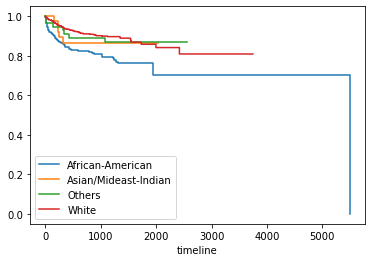

In [55]:
ax = plt.subplot(111)

km = KaplanMeierFitter()

for name, grouped_df in Lung.groupby('Category_Race'):
    km.fit(grouped_df["Survival_Days"], grouped_df["Death"], label=name)
    km.plot_survival_function(ax=ax,ci_show=False)

In [56]:
Race = data[data.Category_Race == "White"]

In [57]:
Race

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG.DT,...,MELANOMA_DT,multiple_cancer,cancer_type,Category_Race,Age,ageCat,Diag_date,Death,Target,Survival_Days
18,04/09/49,NaN,Female,White,0,0,1,0,0,NaN,...,NaN,1,Thyroid Cancer,White,67,"(60,70]",19/03/14,0,25/08/16,890
19,19/12/70,NaN,Female,White,0,0,0,1,0,NaN,...,NaN,1,Colorectal Cancer,White,46,"(40,50]",09/12/13,0,25/08/16,990
20,28/02/26,NaN,Male,White,1,0,0,0,0,01/12/15,...,NaN,1,Lung Cancer,White,90,"(80,90]",01/12/15,0,25/08/16,268
31,24/06/38,NaN,Male,White,0,1,0,0,0,NaN,...,NaN,1,Pancreatic Cancer,White,78,"(70,80]",19/11/13,0,25/08/16,1010
40,12/07/45,NaN,Male,White,1,0,0,0,0,03/10/13,...,NaN,1,Lung Cancer,White,71,"(70,80]",03/10/13,0,25/08/16,1057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122,03/05/26,NaN,Male,White,1,0,0,0,0,14/08/15,...,NaN,1,Lung Cancer,White,90,"(80,90]",14/08/15,0,25/08/16,377
4123,23/06/53,NaN,Female,White,0,0,0,1,0,NaN,...,NaN,1,Colorectal Cancer,White,63,"(60,70]",10/11/15,0,25/08/16,289
4124,23/07/76,NaN,Female,White,0,0,1,0,0,NaN,...,NaN,1,Thyroid Cancer,White,40,"(30,40]",13/06/14,0,25/08/16,804
4126,29/12/55,NaN,Female,White,0,0,0,0,1,NaN,...,06/01/13,1,Melanoma,White,61,"(60,70]",06/01/13,0,25/08/16,1327


In [58]:
km.fit(durations = Race["Survival_Days"], event_observed = Race["Death"])

<lifelines.KaplanMeierFitter:"White", fitted with 2806 total observations, 2654 right-censored observations>

In [59]:
km.predict(2500)

0.9119600736647215